<a href="https://colab.research.google.com/github/Akash-singh45/Restaurant-insights/blob/main/Level_2_Task_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ Task 1: Restaurant Ratings
Objectives:

Analyze the distribution of aggregate ratings

Find the most common rating range

Calculate the average number of votes recieved by restaurants.

In [2]:
# import all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Dataframe creation.
df = pd.read_csv('/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


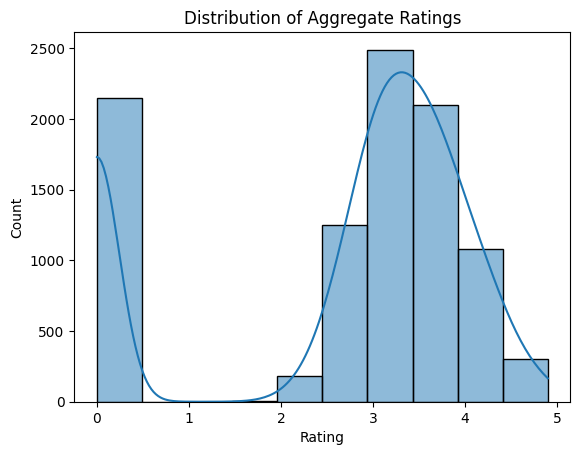

In [5]:
#Analyze the distribution of aggregate ratings

# Distribution plot
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



In [6]:
# Create bins for rating ranges
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['rating_range'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

# Count occurrences in each range
rating_range_counts = df['rating_range'].value_counts().sort_index()
print(rating_range_counts)

#most common rating range
most_common_range = rating_range_counts.idxmax()
print(f"The most common rating range is: {most_common_range}")


rating_range
0-1    2148
1-2      10
2-3    1891
3-4    4388
4-5    1114
Name: count, dtype: int64
The most common rating range is: 3-4


In [7]:

# Average votes
avg_votes = df['Votes'].mean()
print(f"Average number of votes: {avg_votes:.2f}")

Average number of votes: 156.91


# Task 2: Cuisine Combination

 Identify the most common combinations of
 cuisines in the dataset.

 Determine if certain cuisine combinations
 tend to have higher ratings.


In [8]:
Most_common_cuisines = df['Cuisines'].value_counts().head(10)
print('Most Commmon cuisines combination: ' , Most_common_cuisines )

Most Commmon cuisines combination:  Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [9]:
#Grouping and checking ratings
rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Top cuisine combinations by average rating:")
print(rating_by_cuisine.head(10))

Top cuisine combinations by average rating:
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


# Task 3 : Geographic Analysis

 Plot the locations of restaurants on a
 map using longitude and latitude
 coordinates.

 Identify any patterns or clusters of
 restaurants in specific areas.


In [10]:
import folium

# Create base map
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Add restaurant markers
for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map)

map.save('restaurant_map.html')
print("✅ Map saved as 'restaurant_map.html'. Open it in a browser.")


✅ Map saved as 'restaurant_map.html'. Open it in a browser.


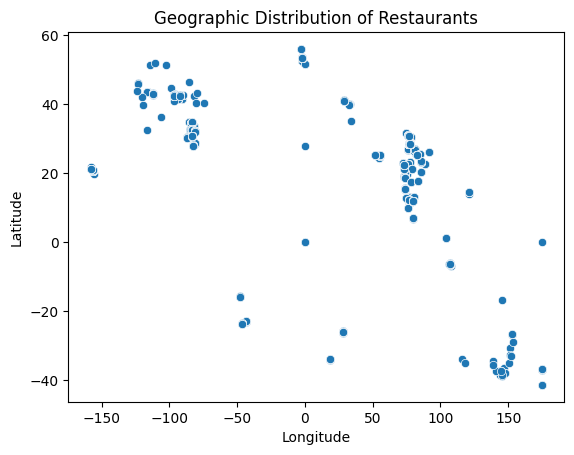

In [11]:
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.title('Geographic Distribution of Restaurants')
plt.show()


In [12]:
# Using Kmeans clustering to visualize it in better way
from sklearn.cluster import KMeans
# Drop NaNs just in case
df = df.dropna(subset=['Latitude', 'Longitude'])

# Prepare features for clustering
coords = df[['Latitude', 'Longitude']]

Applying Kmeans Clustering

In [13]:
# Decide number of clusters (you can tweak n_clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)


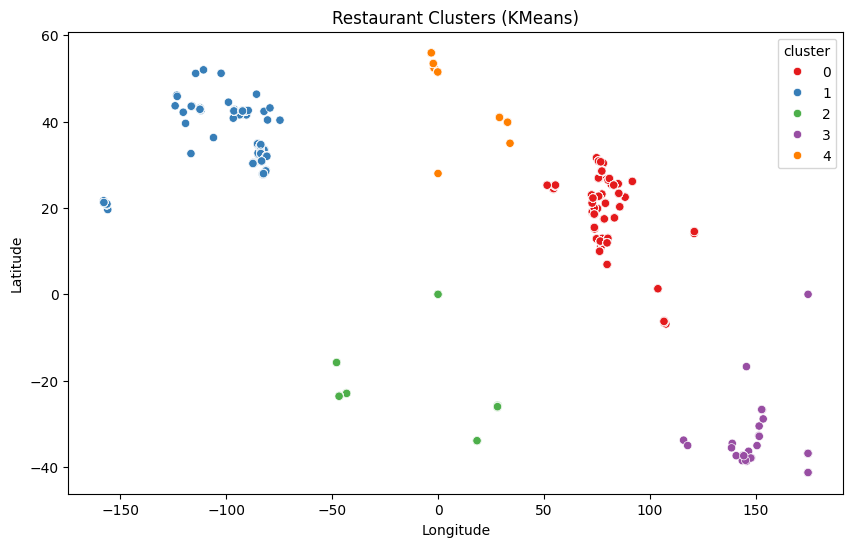

In [14]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='cluster',
    palette='Set1',
    data=df,
    legend='full'
)
plt.title('Restaurant Clusters (KMeans)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Task 4: Restaurant Chains

 Identify if there are any restaurant chains
 present in the dataset.

 Analyze the ratings and popularity of
 different restaurant chains

In [15]:

# Count how many times each restaurant name appears
name_counts = df['Restaurant Name'].value_counts()

# Filter for chains (more than 1 entry)
chains = name_counts[name_counts > 1].index.tolist()

# Filter dataset to include only chains
chain_df = df[df['Restaurant Name'].isin(chains)]

print(f"✅ Number of chains identified: {len(chains)}")
print("Sample chains:")
print(chain_df['Restaurant Name'].value_counts().head())


✅ Number of chains identified: 734
Sample chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64


In [19]:

# Create a grouped dataframe with all calculations
# Group and analyze
grouped = chain_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).copy()

# Add branch count
grouped['branch_count'] = chain_df['Restaurant Name'].value_counts()

# Sort by branch count
grouped = grouped.sort_values(by='branch_count', ascending=False)

# Display top chains
print(grouped.head())

                  Aggregate rating  Votes  branch_count
Restaurant Name                                        
Cafe Coffee Day           2.419277   2428            83
Domino's Pizza            2.740506   6643            79
Subway                    2.907937   6124            63
Green Chick Chop          2.672549    964            51
McDonald's                3.339583   5291            48


NameError: name 'chain_analysis' is not defined